<a href="https://colab.research.google.com/github/boangri/neuraluniversity/blob/master/HW02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к занятию №2 "Полносвязные сети, обучающая и тестовая выборки" 2.08.2020

Борис Грибовский <xinu@yandex.ru>

## LIGHT

In [ ]:
from tensorflow.keras.models import Sequential # НС прямого распространения
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from tensorflow.keras import utils # Утилиты для to_categorical
from tensorflow.keras.preprocessing import image # Для отрисовки изображения
from tensorflow.keras.optimizers import Adam, Adadelta # Алгоритмы оптимизации, для настройки скорости обучения
import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Отрисовка изображений
from PIL import Image # Отрисовка изображений
import pandas as pd # Библиотека pandas
from google.colab import files # Импорт файлов
from sklearn.preprocessing import LabelEncoder, StandardScaler # Функции для нормализации данных
from sklearn import preprocessing # Пакет предварительной обработки данных

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

In [ ]:
# Берем модель из занятия 1:
# 2. Загрузка базы MNIST
from tensorflow.keras.datasets import mnist 
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

In [ ]:
# 3. Нормирование и преобразование x_train и y_train.
# Преобразуем двумерное представление в одномерное:
# 28x28 -> 784:
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
# Нормализуем входные картинки
x_train = x_train.astype('float32')
x_train = x_train / 255 
x_test = x_test.astype('float32') 
x_test = x_test / 255 
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [ ]:
# 4. Создание нейронной сети.
def build_model(size=(800,400)):
  # Создаем модель из 2-х слоев с 800 и 400 нейронами.
  model = Sequential()
  first = True
  for n in size:
    if first:
      model.add(Dense(n, input_dim=784, activation="relu"))
      first = False
    else:
      model.add(Dense(n, activation="relu"))
  model.add(Dense(10, activation="softmax"))
  # Компилляция:
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  return model

## 1. Сеть с различными размерами обучающей и проверочной выборок: 


In [ ]:
# Функция для построения графиков истории обучения
def visualizeHistory(history, n, figsize=(12,5)):
  # Точность
  plt.figure(figsize=figsize)
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
  plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.title('Доля верных ответов при обучающей выборке %d' % n)
  plt.legend()
  # Ошибки
  plt.subplot(1,2,2)
  plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
  plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Ошибка')
  plt.title('Ошибка при обучающей выборке %d' % n)
  plt.legend()
  plt.show()

In [ ]:
# Создадим массивы для хранения результатов.
train_sizes = (50000, 10000, 500) # размеры обучающей выборки
models  = ('(800,400)', '(200)', '(20)', '(400,200,100)') # число нейронов в слоях
accuracies = np.zeros((len(train_sizes), len(models))) # сюда будем писать результаты
mname = '(800,400)' # имя текущей модели

### a. Обучающая выборка 50000 примеров

In [ ]:
%%time
# a. Обучающая выборка 50.000 примеров 
n = 50000
x_train_a = x_train[:n,:]
y_train_a = y_train[:n,:] 
model = build_model()
# как вариант используем параметр validation_split для резервирования данных для валидации
history = model.fit(x_train_a, y_train_a, batch_size=128, epochs=15, verbose=0, validation_split=0.2)

CPU times: user 2min 21s, sys: 3.97 s, total: 2min 25s
Wall time: 1min 18s


In [ ]:
# Вычисляем результаты сети на тестовом наборе
scores = model.evaluate(x_test, y_test, verbose=1)
# scores состоит из двух знанчений
# scores[0] - loss сети на тестовой выборке
# scores[1] - процент правильно распознанных примеров на тестовой выборке
print(scores)
print("Доля верных ответов на тестовых данных, в процентах: %.2f%%" % (scores[1] * 100))
accuracies[train_sizes.index(n), models.index(mname)] = scores[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.1107 - accuracy: 0.9780
[0.11069466918706894, 0.9779999852180481]
Доля верных ответов на тестовых данных, в процентах: 97.80%


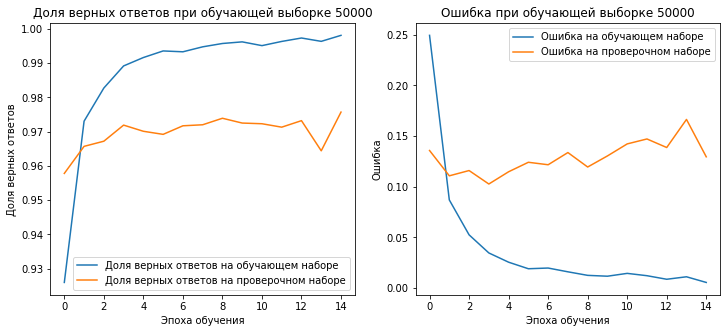

In [ ]:
visualizeHistory(history, n)

### b. Обучающая выборка 10000 примеров

In [ ]:
%%time
# b. Обучающая выборка 10.000 примеров 
n = 10000
m = 2000  # для валидации
x_train_b = x_train[:n-m,:]
y_train_b = y_train[:n-m,:] 
x_val_b = x_train[n-m:n,:]
y_val_b = y_train[n-m:n,:] 
model = build_model()
# как вариант используем параметр validation_data для резервирования данных для валидации
history = model.fit(x_train_b, y_train_b, batch_size=128, epochs=100, verbose=0, validation_data=(x_val_b, y_val_b))

CPU times: user 3min 18s, sys: 5.56 s, total: 3min 23s
Wall time: 1min 51s


In [ ]:
# Вычисляем результаты сети на тестовом наборе
scores = model.evaluate(x_test, y_test, verbose=1)
# scores состоит из двух знанчений
# scores[0] - loss сети на тестовой выборке
# scores[1] - процент правильно распознанных примеров на тестовой выборке
print(scores)
print("Доля верных ответов на тестовых данных, в процентах: %.2f%%" % (scores[1] * 100))
accuracies[train_sizes.index(n), models.index(mname)] = scores[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.2698 - accuracy: 0.9596
[0.26976749300956726, 0.9595999717712402]
Доля верных ответов на тестовых данных, в процентах: 95.96%


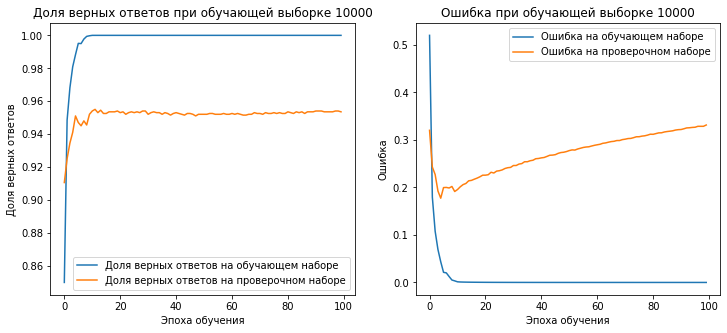

In [ ]:
visualizeHistory(history, n)

### c. Обучающая выборка 500 примеров

In [ ]:
%%time
# c. Обучающая выборка 500 примеров 
n = 500
m = 100  # для валидации
x_train_с = x_train[:n-m,:]
y_train_с = y_train[:n-m,:] 
x_val_с = x_train[n-m:n,:]
y_val_с = y_train[n-m:n,:] 
model = build_model()
# как вариант используем параметр validation_data для резервирования данных для валидации
history = model.fit(x_train_с, y_train_с, batch_size=100, epochs=100, verbose=0, validation_data=(x_val_с, y_val_с))

CPU times: user 13.8 s, sys: 406 ms, total: 14.2 s
Wall time: 9.22 s


In [ ]:
# Вычисляем результаты сети на тестовом наборе
scores = model.evaluate(x_test, y_test, verbose=1)
# scores состоит из двух значений
# scores[0] - loss сети на тестовой выборке
# scores[1] - процент правильно распознанных примеров на тестовой выборке
print(scores)
print("Доля верных ответов на тестовых данных, в процентах: %.2f%%" % (scores[1] * 100))
accuracies[train_sizes.index(n), models.index(mname)] = scores[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.8049 - accuracy: 0.8429
[0.8049439191818237, 0.8428999781608582]
Доля верных ответов на тестовых данных, в процентах: 84.29%


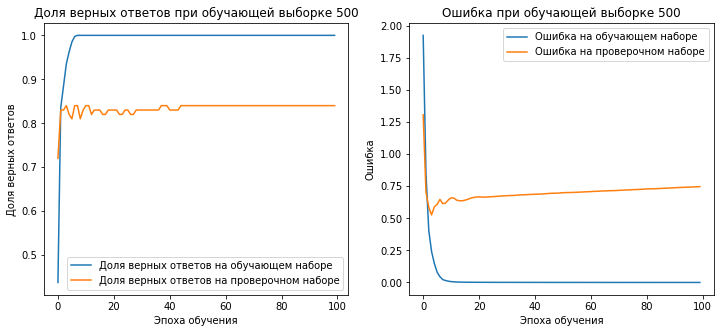

In [ ]:
visualizeHistory(history, n)

## 2. Создайте еще два варианта сети 

и сравните значения точности на проверочной выборке (на  последней эпохе) и на тестовой выборке. Сделайте сравнительную таблицу.

Мы получили явные признаки переобучения - значительное различие между точностью на обучающем и проверочном наборе, рост ошибки с эпохами.

Можно попытаться бороться с переобучением, упростив архитектуру сети - оставив только 1 скрытый слой (было 2) и уменьшив число нейронов в нем.

313/313 [==============================] - 0s 2ms/step - loss: 0.1545 - accuracy: 0.9796
[0.15453630685806274, 0.9796000123023987]
Доля верных ответов на тестовых данных, в процентах: 97.96%


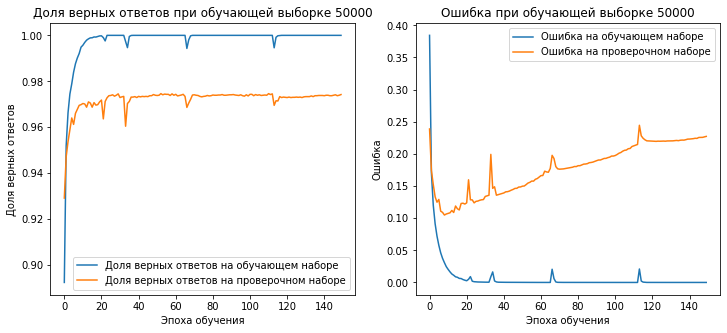

313/313 [==============================] - 0s 1ms/step - loss: 0.2818 - accuracy: 0.9548
[0.28183093667030334, 0.954800009727478]
Доля верных ответов на тестовых данных, в процентах: 95.48%


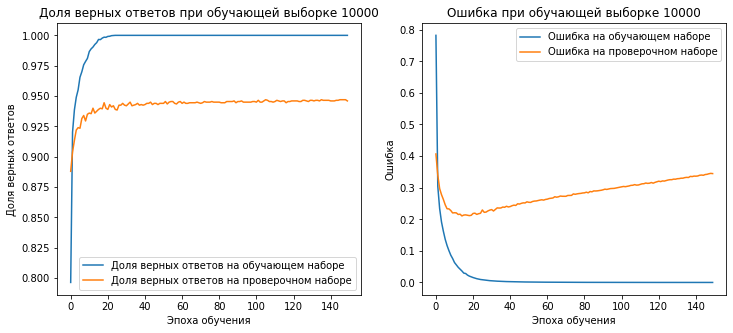

313/313 [==============================] - 0s 1ms/step - loss: 0.6723 - accuracy: 0.8348
[0.6723024845123291, 0.8348000049591064]
Доля верных ответов на тестовых данных, в процентах: 83.48%


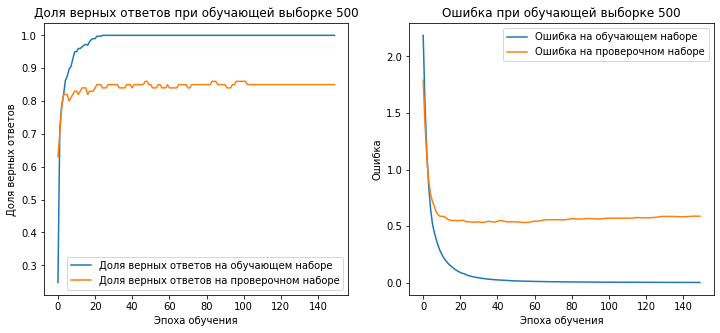

313/313 [==============================] - 0s 1ms/step - loss: 0.2990 - accuracy: 0.9536
[0.2990166246891022, 0.9535999894142151]
Доля верных ответов на тестовых данных, в процентах: 95.36%


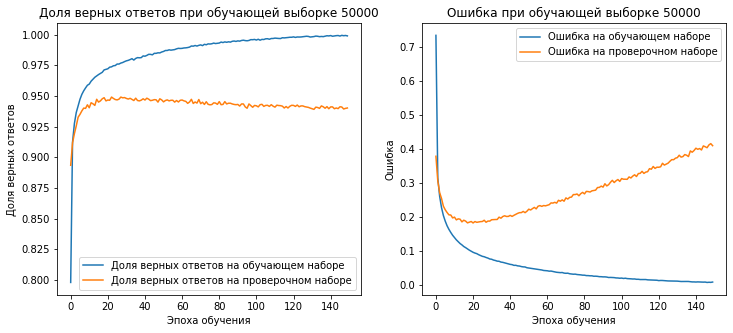

313/313 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.9215
[0.4307762682437897, 0.921500027179718]
Доля верных ответов на тестовых данных, в процентах: 92.15%


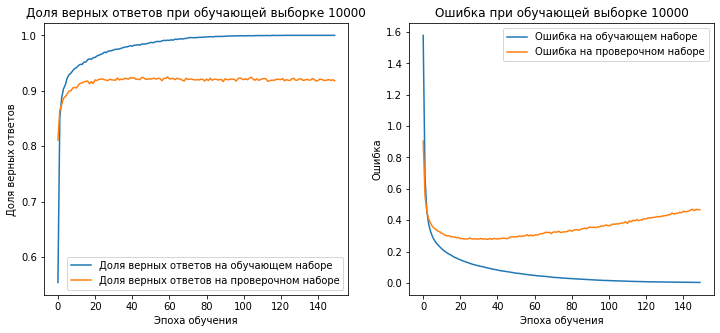

313/313 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.8059
[0.6679798364639282, 0.805899977684021]
Доля верных ответов на тестовых данных, в процентах: 80.59%


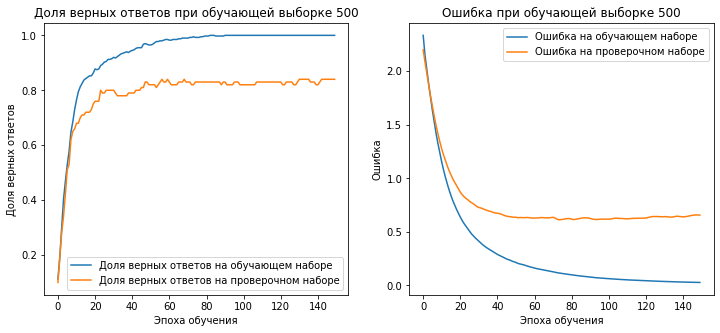

In [ ]:
for size in ((200,), (20,)):  # (200,) - означает 1 скрытый слой в 200 нейронов.
  for n in (50000, 10000, 500):  # перебор различных размеров обучающей выборки
    x_train_a = x_train[:n,:]
    y_train_a = y_train[:n,:] 
    model = build_model(size)
    history = model.fit(x_train_a, y_train_a, batch_size=128, epochs=150, verbose=0, validation_split=0.2)
    scores = model.evaluate(x_test, y_test, verbose=1)
    print(scores)
    print("Доля верных ответов на тестовых данных, в процентах: %.2f%%" % (scores[1] * 100))
    mname = '(200)' if size[0] == 200 else '(20)'
    accuracies[train_sizes.index(n), models.index(mname)] = scores[1]
    visualizeHistory(history, n)

## 3. Создайте сеть следующей архитектуры: 

1. 4 Dense слоя
2. 3 Dropout слоя 
3. 3 BatchNormalization слоя






In [ ]:
# Добавим в исходную модель слои для регуляризации
def build_another_model():
  model = Sequential()
  model.add(Dense(400, input_dim=784, activation="relu"))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(200, activation="relu"))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(100, activation="relu"))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(10, activation="softmax"))
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  return model

313/313 [==============================] - 1s 2ms/step - loss: 0.0756 - accuracy: 0.9805
[0.07555433362722397, 0.9804999828338623]
Доля верных ответов на тестовых данных, в процентах: 98.05%


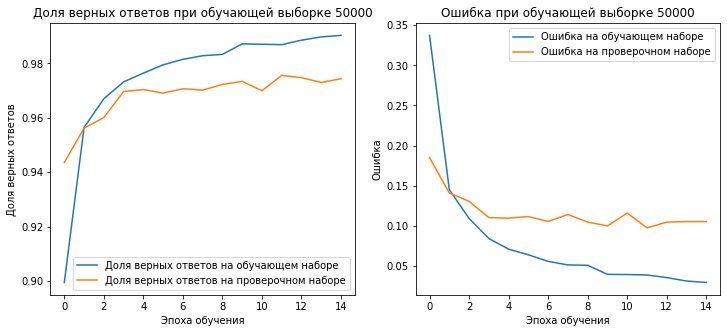

313/313 [==============================] - 1s 2ms/step - loss: 0.1683 - accuracy: 0.9564
[0.16826850175857544, 0.9563999772071838]
Доля верных ответов на тестовых данных, в процентах: 95.64%


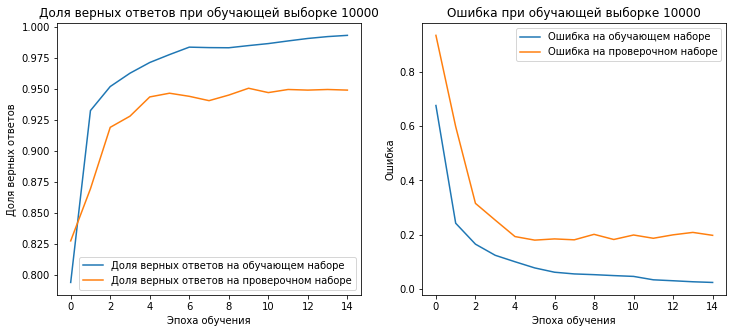

313/313 [==============================] - 1s 2ms/step - loss: 1.2475 - accuracy: 0.7911
[1.2475149631500244, 0.791100025177002]
Доля верных ответов на тестовых данных, в процентах: 79.11%


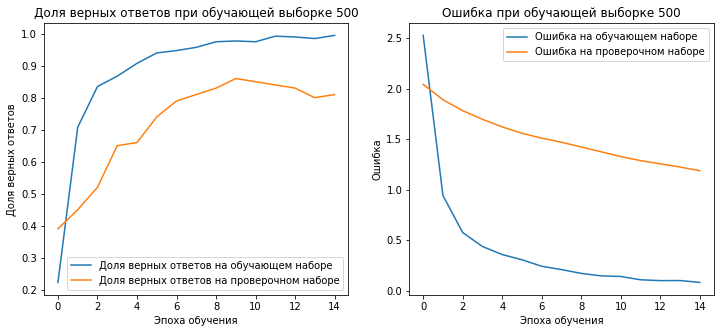

In [ ]:
# Повторим 
mname = '(400,200,100)'
for n in (50000, 10000, 500):
  x_train_a = x_train[:n,:]
  y_train_a = y_train[:n,:] 
  model = build_another_model()
  history = model.fit(x_train_a, y_train_a, batch_size=128, epochs=15, verbose=0, validation_split=0.2)
  scores = model.evaluate(x_test, y_test, verbose=1)
  print(scores)
  print("Доля верных ответов на тестовых данных, в процентах: %.2f%%" % (scores[1] * 100))
  accuracies[train_sizes.index(n), models.index(mname)] = scores[1]
  visualizeHistory(history, n)

In [ ]:
# Соберем полученные результаты в таблицу
df = pd.DataFrame(accuracies, columns=models, index=train_sizes)
df

,"(800,400)",(200),(20),"(400,200,100)"
50000,0.9780,0.9796,0.9536,0.9805
10000,0.9596,0.9548,0.9215,0.9564
500,0.8429,0.8348,0.8059,0.7911


**ВЫВОДЫ**

Было исследовано влияние размера обучающей выборки на точность классификации для 4-х моделей:

1.   Сложная двухслойная (800,400) без регуляризации
2.   Простая однослойная (200) без регуляризации
1.   Совсем уж простая однослойная (20) без регуляризации
2.   Сложная трехслойная (400,200,100) с интенсивной регуляризацией

Результаты (доля правильных ответов) представлены в таблице выше.

Выводы:

*   Точность возрастает с увеличением размера обучающей выборки - на всех моделях
*   При больших выборках (50000) точность всех моделей (кроме самой примитивной) примерно одинакова и равна 98%.
*   При средних выборках (10000) точность также не зависит от архитектуры и составляет 95-96%
*   На малых (500) выборках регуляризация заметно ухудшает результат
*   На малых выборках становится заметен статистический разброс результатов 
*   Для данной задачи достаточно одного скрытого слоя с 200 нейронами, дальнейшее усложнение модели не дает прироста точности а лишь приводит переобучению и увеличению времени обучения. 






## PRO Variant 1

Повысьте точность модели по обнаружению мин до 90 % на тестовой выборке. Можно использовать различные варианты слоев Dropout и BatchNormalization. Можно менять количество примеров в обучающей и проверочной выборках, но нельзя менять количество примеров в тестовой. 


In [ ]:
!wget http://www.xland.ru/uai/hw02/sonar.csv
# Загружаем данные из файла sonar.csv
df = pd.read_csv("sonar.csv", header=None)   # header=None, когда данные не имеют строки с заголовками
df.shape
df.head()   

--2020-08-03 17:33:20--  http://www.xland.ru/uai/hw02/sonar.csv
Resolving www.xland.ru (www.xland.ru)... 198.211.125.59
Connecting to www.xland.ru (www.xland.ru)|198.211.125.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87776 (86K) [text/csv]
Saving to: ‘sonar.csv.1’

sonar.csv.1         100%[===================>]  85.72K   170KB/s    in 0.5s    

2020-08-03 17:33:21 (170 KB/s) - ‘sonar.csv.1’ saved [87776/87776]



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
dataset = df.values                 # Берем только значения массива(без индексов)
X = dataset[:,0:60].astype(float)   # Присваиваем им тип данных - float(с плавающей точкой) данным с 0 по 60 колонки
Y = dataset[:,60]                   # Присваеваем значению Y данные из столбца с индексом 60
Y[Y=='R']='0'                       # Если значение элемента столбца равно 'R', присваеваем ему значение '0'
Y[Y=='M']='1'                       # Если значение элемента столбца равно 'Y', присваеваем ему значение '1'
Y = Y.astype(int)                   # Меняем тип данных столбца на 'int'(целочисленный тип данных)
print(X.shape)                      # Выводим размерность X
print(Y.shape)                      # Выводим размерность Y
print(Y)          

(208, 60)
(208,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)    
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(166, 60)
(42, 60)
(166,)
(42,)


In [ ]:
# Функция пересоздаёт пустую сеть
def createModel():
  model = Sequential()
  model.add(Dense(60, input_dim=60, activation='relu'))
  model.add(Dense(30,  activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
  return model 

In [ ]:
# Создаём пустую сеть при помощи функции createModel()
model = createModel()
history = model.fit(x_train, y_train, batch_size=8, epochs=100, validation_split=0.2, verbose=0)       

2/2 [==============================] - 0s 3ms/step - loss: 0.5788 - accuracy: 0.8571
[0.5788019895553589, 0.8571428656578064]
Доля верных ответов на тестовых данных, в процентах: 85.71%


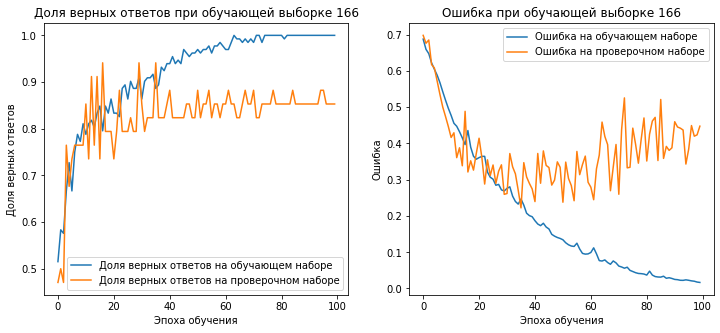

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print(scores)
print("Доля верных ответов на тестовых данных, в процентах: %.2f%%" % (scores[1] * 100))
visualizeHistory(history, len(x_train))

Налицо явные признаки переобучения, вызванные в первую очередь слишком малым объемом базы. Второе следствие малого числа примеров - сильная вариативность показателей. Точность сильно меняется от прогона к прогону, и для получения статистически значимого результата необходимо провести серию экспериментов. Я проводил все измерения сериями по 100 прогонов, это позволило повысить точность оценки параметров в 10 раз (10 - корень из числа наблюдений)

Доля верных ответов на тестовых данных, в процентах: 88.71% std=2.66%


(array([ 2.,  3.,  0.,  0., 18., 35.,  0.,  0., 28., 14.]),
 array([80.95238209, 82.14285791, 83.33333373, 84.52380955, 85.71428537,
        86.9047612 , 88.09523702, 89.28571284, 90.47618866, 91.66666448,
        92.8571403 ]),
 <a list of 10 Patch objects>)

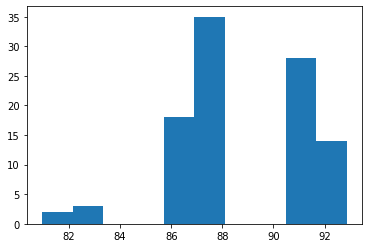

In [ ]:
# исходная модель (без регуляризации)
n = 100 # число повторений для усреднения результатов
rate = np.zeros((n,))
for _ in range(n):
  model = createModel()
  history = model.fit(x_train, y_train, batch_size=8, epochs=100, validation_split=0.2, shuffle=True, verbose=0)       
  scores = model.evaluate(x_test, y_test, verbose=0)
  rate[_] = scores[1]*100.
  mean = rate.mean()
  std = rate.std()
print("Доля верных ответов на тестовых данных, в процентах: %.2f%% std=%.2f%%" % (mean, std))
# Доля верных ответов на тестовых данных, в процентах: 87.95% std=3.30%
# Доля верных ответов на тестовых данных, в процентах: 87.98% std=2.68%
plt.hist(rate)

На гистограмме видно, что в части экспериментов точность превосходила 90% без всякой оптимизации, однако средняя точность составлила 88.0% (стандартная ошибка 0.3%)

In [ ]:
# Пробуем применить регуляризацию.
# Добавлены дропауты после каждого слоя.
def createModel2():
  model = Sequential()
  model.add(Dropout(0.3, input_shape=(60,)))  
  model.add(Dense(60, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(30, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
  return model 

In [ ]:
n = 100
rate2 = np.zeros((n,))
for _ in range(n):
  model = createModel2()
  history = model.fit(x_train, y_train, batch_size=8, epochs=100, validation_split=0.2, shuffle=True, verbose=0)       
  scores = model.evaluate(x_test, y_test, verbose=0)
  rate2[_] = scores[1]*100.
  mean = rate2.mean()
  std = rate2.std()
print("Доля верных ответов на тестовых данных, в процентах: %.2f%% std=%.2f%%" % (mean, std))
# Доля верных ответов на тестовых данных, в процентах: 80.64% std=3.85%

Доля верных ответов на тестовых данных, в процентах: 80.64% std=3.85%


(array([ 1.,  4., 21.,  0., 16., 19.,  0., 20., 16.,  3.]),
 array([71.42857313, 73.0952394 , 74.76190567, 76.42857194, 78.09523821,
        79.76190448, 81.42857075, 83.09523702, 84.76190329, 86.42856956,
        88.09523582]),
 <a list of 10 Patch objects>)

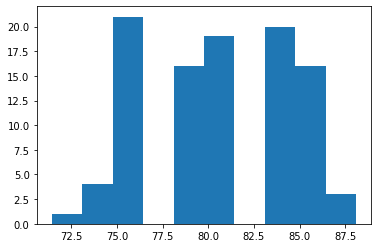

In [ ]:
plt.hist(rate2)

Регуляризация привела к заметному ухудшению точности - 80.6% +- 0.3%. Возможно это было связано со слишком большой вероятностью (30%) дропаутов.

In [ ]:
# Добавлена батч-нормализация и дропаут после каждого слоя.
def createModel3():
  model = Sequential()
  model.add(BatchNormalization(input_shape=(60, )))
  model.add(Dropout(0.3))  
  model.add(Dense(60, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(30, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
  return model 

Доля верных ответов на тестовых данных, в процентах: 90.79% std=3.12%


(array([ 6.,  4.,  0., 17.,  0., 30., 32.,  0.,  9.,  2.]),
 array([83.33333135, 84.76190269, 86.19047403, 87.61904538, 89.04761672,
        90.47618806, 91.90475941, 93.33333075, 94.76190209, 96.19047344,
        97.61904478]),
 <a list of 10 Patch objects>)

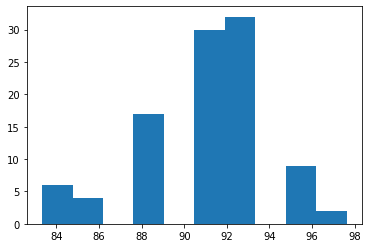

In [ ]:
n = 100
rate3 = np.zeros((n,))
for _ in range(n):
  model = createModel3()
  history = model.fit(x_train, y_train, batch_size=8, epochs=100, validation_split=0.2, shuffle=True, verbose=0)       
  scores = model.evaluate(x_test, y_test, verbose=0)
  rate3[_] = scores[1]*100.
  mean = rate3.mean()
  std = rate3.std()
print("Доля верных ответов на тестовых данных, в процентах: %.2f%% std=%.2f%%" % (mean, std))
# Доля верных ответов на тестовых данных, в процентах: 90.79% std=3.12%
plt.hist(rate3)

**Комбинация дропаутов и батч-регуляризации позволила добиться требуемой точности: 90.8% +- 0.3%**

Проверим статистическую значимость этого результата, оценим вероятность того, что данный результат не является случайной флуктуацией.

разделим отклонение от заявленной границы (0.8%) на стандартное отклонение $\sigma$ по выборке (0.3%) получим $2.67\sigma$

Вероятность такого случайного отклонения можно посмотреть на сайте https://gallery.shinyapps.io/dist_calc/

Эта вероятность равна 0.0039 или менее 0.4%

Полученный результат можно с уверенностью считать статистически значимым (обычно в статистике за порог принимают 5%)

In [ ]:
# Убираем дропауты, оставляем батч-нормализацию после каждого слоя.
def createModel4():
  model = Sequential()
  model.add(BatchNormalization(input_shape=(60, ))) 
  model.add(Dense(60, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(30, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
  return model 

Доля верных ответов на тестовых данных, в процентах: 86.50% std=3.63%


(array([ 2.,  1.,  7., 16.,  0., 31., 22., 12.,  8.,  1.]),
 array([76.19047761, 78.0952394 , 80.00000119, 81.90476298, 83.80952477,
        85.71428657, 87.61904836, 89.52381015, 91.42857194, 93.33333373,
        95.23809552]),
 <a list of 10 Patch objects>)

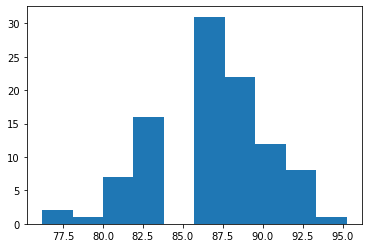

In [ ]:
n = 100
rate4 = np.zeros((n,))
for _ in range(n):
  model = createModel4()
  history = model.fit(x_train, y_train, batch_size=8, epochs=100, validation_split=0.2, shuffle=True, verbose=0)       
  scores = model.evaluate(x_test, y_test, verbose=0)
  rate4[_] = scores[1]*100.
  mean = rate4.mean()
  std = rate4.std()
print("Доля верных ответов на тестовых данных, в процентах: %.2f%% std=%.2f%%" % (mean, std))
# Доля верных ответов на тестовых данных, в процентах: 86.50% std=3.63%
plt.hist(rate4)

В этом варианте точность опять опустилась ниже 90%: 86.5% +- 0.3%

**ВЫВОДЫ**

Были проведены статистические эксперименты с четырмя различными наборами гиперпараметров. Один набор без регуляризации и 3 - с регуляризацией.
Была найдена модель, дающая точность более 90%. Была оценена вероятность того, что это не было результатом случайности. Вероятность - 99.6%

## PRO Variant 2

По подготовленным на занятии данным создайте обучающую, тестовую и проверочную выборки. По сформированным данным необходимо обучить модель для предсказания цены машины. Оцените качество работы созданной сети, определив средний процент ошибки на проверочной выборке. (Для этого потребуется привести предсказанные моделью значения к первоначальному диапазону цен. Это можно сделать с помощью следующего метода: 

predict_inverse = y_scaler.inverse_transfrom(predict).flatten() 

где predict - результат предсказания модели). Затем подсчитайте ошибку на каждом примере тестовой выборки и суммарный процент ошибки. Рекомендации: 
* В качестве ошибки рекомендуется использовать среднеквадратическую ошибку (mse). 
* Метрику для данной задачи можно не использовать. 
* Последний слой модели должен иметь 1 нейрон. 


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler # Функции для нормализации данных
from sklearn import preprocessing # Пакет предварительной обработки данных

# Скачиваем базу из интернетов
!wget http://www.xland.ru/uai/hw02/cars_new.csv
# Считываем csv с помощью pandas
cars = pd.read_csv('cars_new.csv', sep=',')
cars[:5] # Выводим первые 5 машин 

--2020-08-03 11:19:01--  http://www.xland.ru/uai/hw02/cars_new.csv
Resolving www.xland.ru (www.xland.ru)... 198.211.125.59
Connecting to www.xland.ru (www.xland.ru)|198.211.125.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7561888 (7.2M) [text/csv]
Saving to: ‘cars_new.csv.1’

cars_new.csv.1      100%[===================>]   7.21M  3.14MB/s    in 2.3s    

2020-08-03 11:19:04 (3.14 MB/s) - ‘cars_new.csv.1’ saved [7561888/7561888]



,mark,model,price,year,mileage,body,kpp,fuel,volume,power
0,kia,cerato,996000,2018,28000,седан,автомат,бензин,2.0,150.0
1,daewoo,nexia 1 поколение [2-й рестайлинг],140200,2012,60500,седан,механика,бензин,1.5,80.0
2,suzuki,jimny 3 поколение [рестайлинг],750000,2011,29000,внедорожник,автомат,бензин,1.3,85.0
3,bmw,x1 18 e84 [рестайлинг],970000,2014,49500,кроссовер,автомат,бензин,2.0,150.0
4,chevrolet,lacetti 1 поколение,205000,2007,151445,седан,механика,бензин,1.4,95.0


In [ ]:
# Создаём словарь поле - его индекс
def create_dict(s):
  ret = {}                          # Создаём пустой словарь
  for _id, name in enumerate(s):    # Проходим по всем парам - id и название
    ret.update({name: _id})         # Добавляем в словарь
  return ret

# Функция преобразования в one hot encoding
def to_ohe(value, d):
  arr = [0] * len(d)
  arr[d[value]] = 1
  return arr
  
# Создаём словари по всем текстовым колонкам
marks_dict = create_dict(set(cars['mark']))
models_dict = create_dict(set(cars['model']))
bodies_dict = create_dict(set(cars['body']))
kpps_dict = create_dict(set(cars['kpp']))
fuels_dict = create_dict(set(cars['fuel']))

# Запоминаем цены
prices = np.array(cars['price'], dtype=np.float)

# Запоминаем числовые параметры
# и нормируем
years = preprocessing.scale(cars['year'])
mileages = preprocessing.scale(cars['mileage'])
volumes = preprocessing.scale(cars['volume'])
powers = preprocessing.scale(cars['power'])  

In [ ]:
y.std()

623679.7167398593

In [ ]:
print(marks_dict)
print(models_dict)

{'chevrolet': 0, 'mitsubishi': 1, 'hyundai': 2, 'daewoo': 3, 'peugeot': 4, 'nissan': 5, 'subaru': 6, 'honda': 7, 'volkswagen': 8, 'mercedes-benz': 9, 'toyota': 10, 'chery': 11, 'ford': 12, 'audi': 13, 'renault': 14, 'mazda': 15, 'suzuki': 16, 'bmw': 17, 'opel': 18, 'skoda': 19, 'kia': 20}
{'s-класс 320 w220': 0, 'l200 2 поколение': 1, 'insignia sports tourer a': 2, 'familia van y11': 3, 'rapid 3 поколение [рестайлинг]': 4, '3 серия e90/e91/e92/e93 [рестайлинг]': 5, 'mustang 6 поколение': 6, 'pajero 4 поколение [2-й рестайлинг]': 7, 'fabia 5j [рестайлинг]': 8, 'rav4 1 поколение': 9, 'datsun d21': 10, 'x5 30 e53': 11, '7 серия 725 e38': 12, 'kadjar 1 поколение': 13, '405 1 поколение [рестайлинг]': 14, 'city 4 поколение [рестайлинг]': 15, 'sonata lf [рестайлинг]': 16, 'laurel c34 [рестайлинг]': 17, 'e-класс 450 w213/s213/c238/a238': 18, 'c-класс amg w205/s205/c205 [рестайлинг]': 19, 'samurai': 20, 'm-класс amg w164 [рестайлинг]': 21, 'fit 3 поколение [рестайлинг]': 22, 'legend 4 поколение

In [ ]:
# Создаём пустую выборку
x = []
y = []

# Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  # В y_train добавляем цену
  y.append(prices[_id])
  
  # В x_train объединяем все параметры
  # Категорийные параметры добавляем в виде ohe
  # Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]
  # Добавляем текущую строку в общий x_train
  x.append(x_tr)

# Превращаем лист в numpy.array
x = np.array(x, dtype=np.float)
y = np.array(y, dtype=np.float)

In [ ]:
x.shape

(70119, 3208)

In [ ]:
years.shape

(70119,)

In [ ]:
y.shape
y.mean(), y.std()

(527726.1014275731, 623679.7167398593)

In [ ]:
# sklearn - популярная библиотека для машинного обучения
# train_test_split - функция разделения на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split
# test_size=0.2 - будет выделено 20% от тренировочных данных 
# shuffle=True - перемешать данные
# x_train - данные для обучения
# x_test - данные для проверки
# y_train - правильные ответы для обучения
# y_test - правильные ответы для проверки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)    
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(56095, 3208)
(14024, 3208)
(56095,)
(14024,)


Нормализуем y_train с помощью
[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()
# Нормализуем y_test с теми же параметрами от y_train:
y_test_scaled = y_scaler.transform(y_test.reshape(-1,1)).flatten()

In [ ]:
# Функция для создания модели 
def createUla(n):
  model = Sequential()
  model.add(Dense(800, input_dim=n, activation='relu'))
  model.add(Dense(400, activation='relu'))
  model.add(Dense(1, activation=None))
  model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['mae'])
  return model 


In [ ]:
ula = createUla(x_train.shape[1])
ula.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 800)               2567200   
_________________________________________________________________
dense_56 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 401       
Total params: 2,888,001
Trainable params: 2,888,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
history = ula.fit(x_train, y_train_scaled, batch_size=128, epochs=50, verbose=1, validation_split=.2)

Epoch 1/50
351/351 [==============================] - 16s 46ms/step - loss: 0.0426 - mae: 0.0978 - val_loss: 0.1195 - val_mae: 0.1304
Epoch 2/50
351/351 [==============================] - 16s 47ms/step - loss: 0.0595 - mae: 0.1076 - val_loss: 0.0915 - val_mae: 0.1178
Epoch 3/50
351/351 [==============================] - 16s 46ms/step - loss: 0.0554 - mae: 0.1043 - val_loss: 0.0966 - val_mae: 0.1149
Epoch 4/50
351/351 [==============================] - 16s 46ms/step - loss: 0.0503 - mae: 0.1001 - val_loss: 0.1313 - val_mae: 0.1323
Epoch 5/50
351/351 [==============================] - 16s 46ms/step - loss: 0.0560 - mae: 0.1066 - val_loss: 0.1087 - val_mae: 0.1257
Epoch 6/50
351/351 [==============================] - 16s 46ms/step - loss: 0.0479 - mae: 0.0978 - val_loss: 0.0954 - val_mae: 0.1129
Epoch 7/50
351/351 [==============================] - 16s 46ms/step - loss: 0.0420 - mae: 0.0936 - val_loss: 0.1619 - val_mae: 0.1405
Epoch 8/50
351/351 [==============================] - 16s 46ms

In [ ]:
# Функция для построения графиков истории обучения
def visualizeUlaHistory(history, scaler, test_loss, figsize=(8,5)):
  loss = scaler.inverse_transform(history.history['loss']) - scaler.mean_[0]
  val_loss = scaler.inverse_transform(history.history['val_loss']) - scaler.mean_[0]
  t_loss = [test_loss]*len(loss)
  plt.figure(figsize=figsize)
  plt.plot(loss, label='Среднекв. ошибка на обучающем наборе')
  plt.plot(val_loss, label='Среднекв. ошибка на проверочном наборе')
  plt.plot(t_loss, label='Среднекв. ошибка на тестовом наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Среднекв. ошибка')
  plt.title('Среднекв. ошибка')
  plt.legend()
  plt.show()

439/439 [==============================] - 3s 7ms/step - loss: 0.1499 - mae: 0.1276
[0.1499289572238922, 0.12758216261863708]
Средняя квад. ошибка на тестовых данных: 94253.59


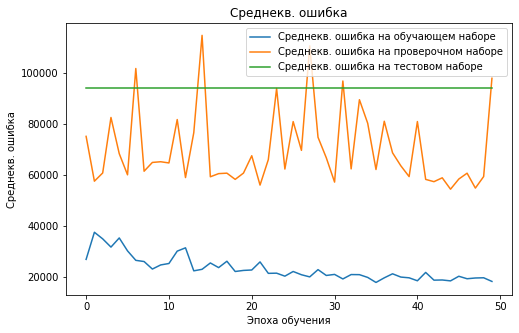

In [ ]:
# Оценим результаты обучения:
scores = ula.evaluate(x_test, y_test_scaled, verbose=1)
print(scores)
test_loss = y_scaler.inverse_transform(np.array(scores).reshape(-1,1))[0] - y_scaler.mean_[0]
print("Средняя квад. ошибка на тестовых данных: %.2f" % test_loss)
visualizeUlaHistory(history, y_scaler, test_loss)

Выводы (промежуточные).

График показывает признаки переобучения - ошибка на проверочной выборке не уменьшается с эпохами, и существенно выше чем ошибка на обучающей выборке. 

Среднеквадратичная ошибка на тестовой выборке 94254, что составляет 17.86% от средней цены по всей базе (624тыр).

Для повышения точности можно попробовать применить регуляризацию.

In [ ]:
# Функция для создания модели с регуляризацией 
# добавили дропаут и батч-нормализацию после каждого слоя.
def createRegUla(n):
  model = Sequential()
  model.add(Dense(800, input_dim=n, activation='relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Dense(400, activation='relu'))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Dense(1, activation=None))
  model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['mae'])
  return model 

In [ ]:
ula = createRegUla(x_train.shape[1])
ula.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 800)               2567200   
_________________________________________________________________
dropout (Dropout)            (None, 800)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 800)               3200      
_________________________________________________________________
dense_59 (Dense)             (None, 400)               320400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 400)               1600      
_________________________________________________________________
dense_60 (Dense)             (None, 1)               

In [ ]:
%%time
history = ula.fit(x_train, y_train_scaled, batch_size=128, epochs=50, verbose=1, validation_split=.2)

Epoch 1/50
351/351 [==============================] - 18s 50ms/step - loss: 0.6631 - mae: 0.5077 - val_loss: 0.5561 - val_mae: 0.3465
Epoch 2/50
351/351 [==============================] - 18s 50ms/step - loss: 0.2369 - mae: 0.2623 - val_loss: 0.1331 - val_mae: 0.1481
Epoch 3/50
351/351 [==============================] - 17s 50ms/step - loss: 0.1697 - mae: 0.2100 - val_loss: 0.1190 - val_mae: 0.1483
Epoch 4/50
351/351 [==============================] - 17s 50ms/step - loss: 0.1441 - mae: 0.1980 - val_loss: 0.1083 - val_mae: 0.1431
Epoch 5/50
351/351 [==============================] - 17s 50ms/step - loss: 0.1317 - mae: 0.1985 - val_loss: 0.1594 - val_mae: 0.1824
Epoch 6/50
351/351 [==============================] - 17s 50ms/step - loss: 0.1216 - mae: 0.1907 - val_loss: 0.1242 - val_mae: 0.1634
Epoch 7/50
351/351 [==============================] - 18s 50ms/step - loss: 0.1209 - mae: 0.1955 - val_loss: 0.1071 - val_mae: 0.1282
Epoch 8/50
351/351 [==============================] - 17s 50ms

439/439 [==============================] - 3s 8ms/step - loss: 0.3063 - mae: 0.1271
[0.30625462532043457, 0.12712566554546356]
Средняя квад. ошибка на тестовых данных: 192528.51


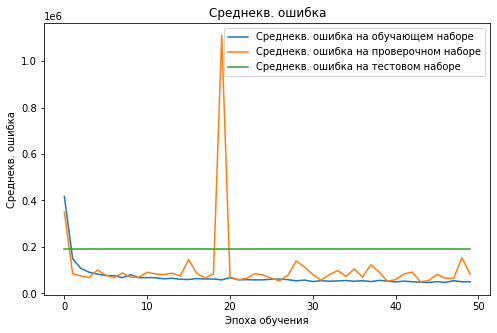

In [ ]:
# Оценим результаты обучения:
scores = ula.evaluate(x_test, y_test_scaled, verbose=1)
print(scores)
test_loss = y_scaler.inverse_transform(np.array(scores).reshape(-1,1))[0] - y_scaler.mean_[0]
print("Средняя квад. ошибка на тестовых данных: %.2f" % test_loss)
visualizeUlaHistory(history, y_scaler, test_loss)

Отмечу странный выброс на 20-й эпохе. Применение регуляризации привело к тому, что ошибки на проверочной и обучающей выборках сравнялись, но зато заметно ухудшились результаты на тестовой выборке - 192528 против 94253 (ухудшение в 2 раза) Остается другой путь - упрощение архитектуры сети

In [ ]:
# Функция для создания упрощенной модели 
# убрали 2-й слой, ослабили дропаут.
def createSimpleUla(n):
  model = Sequential()
  model.add(Dense(800, input_dim=n, activation='relu'))
  model.add(Dropout(0.02)) 
  model.add(BatchNormalization())
  model.add(Dense(1, activation=None))
  model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['mae'])
  return model 

In [ ]:
ula = createSimpleUla(x_train.shape[1])
ula.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 800)               2567200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 800)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 800)               3200      
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 801       
Total params: 2,571,201
Trainable params: 2,569,601
Non-trainable params: 1,600
_________________________________________________________________


In [ ]:
%%time
history = ula.fit(x_train, y_train_scaled, batch_size=128, epochs=50, verbose=1, validation_split=.2)

Epoch 1/50
351/351 [==============================] - 15s 42ms/step - loss: 0.3772 - mae: 0.3536 - val_loss: 0.6678 - val_mae: 0.4123
Epoch 2/50
351/351 [==============================] - 15s 41ms/step - loss: 0.1500 - mae: 0.1975 - val_loss: 0.1404 - val_mae: 0.1678
Epoch 3/50
351/351 [==============================] - 15s 41ms/step - loss: 0.1033 - mae: 0.1683 - val_loss: 0.0976 - val_mae: 0.1284
Epoch 4/50
351/351 [==============================] - 15s 42ms/step - loss: 0.0933 - mae: 0.1523 - val_loss: 0.1102 - val_mae: 0.1354
Epoch 5/50
351/351 [==============================] - 15s 42ms/step - loss: 0.0777 - mae: 0.1409 - val_loss: 0.1174 - val_mae: 0.1406
Epoch 6/50
351/351 [==============================] - 15s 42ms/step - loss: 0.0830 - mae: 0.1498 - val_loss: 0.2792 - val_mae: 0.2146
Epoch 7/50
351/351 [==============================] - 15s 42ms/step - loss: 0.0732 - mae: 0.1418 - val_loss: 0.1054 - val_mae: 0.1233
Epoch 8/50
351/351 [==============================] - 15s 42ms

439/439 [==============================] - 3s 7ms/step - loss: 0.1291 - mae: 0.1181
[0.12908856570720673, 0.11814465373754501]
Средняя квад. ошибка на тестовых данных: 81152.18


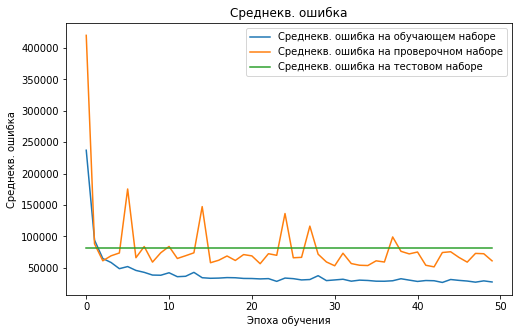

In [ ]:
# Оценим результаты обучения:
scores = ula.evaluate(x_test, y_test_scaled, verbose=1)
print(scores)
test_loss = y_scaler.inverse_transform(np.array(scores).reshape(-1,1))[0] - y_scaler.mean_[0]
print("Средняя квад. ошибка на тестовых данных: %.2f" % test_loss)
visualizeUlaHistory(history, y_scaler, test_loss)

**Вывод**

Были протестированы 3 архитектуры - 2-хслойная, 2-х слойная с сильной регуляризацией, однослойная со умеренной регуляризацией.

В последнем варианте удалось снизить ошибку на тестовой выборке. Теперь она составила 81152 (15.28%) против предыдущего лучшего результата 94253 (17.86%) 